<a href="https://colab.research.google.com/github/Mmbsaksd/Online-Retail/blob/main/Online_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Preprocessing**


In [2]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load dataset
df = pd.read_csv('/content/Online_Retail.xlsx - Online Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
#Print train of tadaset
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
295824,562843,22197,POPCORN HOLDER,3.0,8/9/11 17:37,1.63,NaN,United Kingdom
295825,562843,22219,LOVEBIRD HANGING DECORATION WHITE,1.0,8/9/11 17:37,1.63,NaN,United Kingdom
295826,562843,22224,WHITE LOVEBIRD LANTERN,1.0,8/9/11 17:37,5.79,NaN,United Kingdom
295827,562843,22244,3 HOOK HANGER MAGIC GARDEN,1.0,8/9/11 17:37,4.13,NaN,United Kingdom
295828,562843,22264,FELT FARM ANIMAL WH,NaN,NaN,NaN,NaN,NaN


In [5]:
#Checking shape of dataset
df.shape

(295829, 8)

In [6]:
#Checking type of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295829 entries, 0 to 295828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    295829 non-null  object 
 1   StockCode    295829 non-null  object 
 2   Description  294728 non-null  object 
 3   Quantity     295828 non-null  float64
 4   InvoiceDate  295828 non-null  object 
 5   UnitPrice    295828 non-null  float64
 6   CustomerID   213049 non-null  float64
 7   Country      295828 non-null  object 
dtypes: float64(3), object(5)
memory usage: 18.1+ MB


In [7]:
#Checking Null Value
df.isnull().sum().sort_values(ascending=False)

CustomerID     82780
Description     1101
Quantity           1
InvoiceDate        1
UnitPrice          1
Country            1
InvoiceNo          0
StockCode          0
dtype: int64

In [8]:
#Dropping null value in dataset
df.dropna(inplace=True)

In [9]:
#Checking shape after dropping null value
df.shape

(213049, 8)

In [10]:
#Converting the invoice number columns into str
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

#Removing the row which are cancelled
df= df[~df['InvoiceNo'].str.contains('C')]

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom


In [11]:
#Checking the shape 
df.shape

(207928, 8)

In [12]:
#Checking the columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [13]:
#Checking it describtion
df.describe()

,Quantity,UnitPrice,CustomerID
count,207928.000000,207928.000000,207928.000000
mean,13.476348,3.211150,15285.529698
std,169.100587,22.016003,1730.721520
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13854.000000
50%,6.000000,1.950000,15149.000000
75%,12.000000,3.750000,16839.000000
max,74215.000000,8142.750000,18287.000000


#**Exploratory data analysis**


In [14]:
#Creating DataFrame on description and count
Description_df = df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index':'Description_Name'},inplace=True)
Description_df.rename(columns={'Description':'Count'}, inplace=True)
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,1350
1,REGENCY CAKESTAND 3 TIER,1135
2,PARTY BUNTING,1007
3,JUMBO BAG RED RETROSPOT,901
4,LUNCH BAG RED RETROSPOT,812


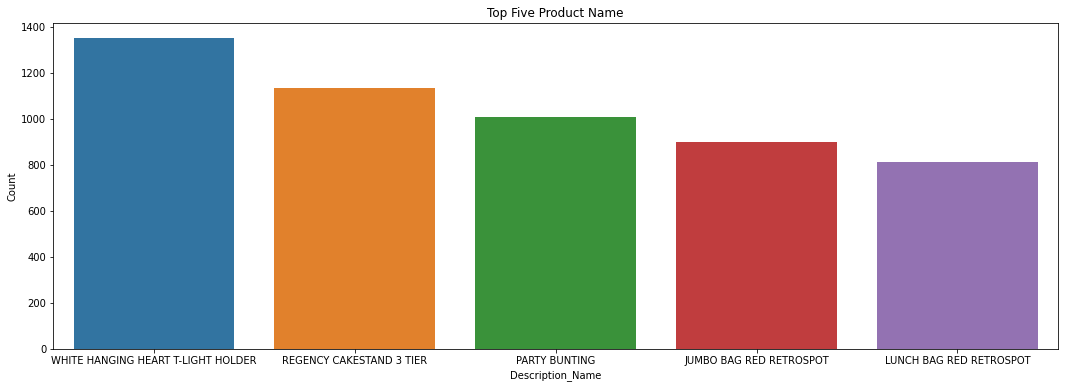

In [15]:
#Plotting on barplot
plt.figure(figsize=(18,6))
plt.title('Top Five Product Name')
sns.barplot(x='Description_Name',y='Count', data=Description_df[:5])

**Top Five product based on selling**


1.   Whit Hanging Heart Light Holder
2.   Regency Cake Stand 3 Tier
3.   Jumbo Bang Red Retrospect
4.   Assorted Colour Bird Arangment
5.   Party Bunting

In [16]:
#Printing last five rows
Description_df.tail()

,Description_Name,Count
3480,GREEN MURANO TWIST NECKLACE,1
3481,MUMMY MOUSE RED GINGHAM RIBBON,1
3482,PACK 4 FLOWER/BUTTERFLY PATCHES,1
3483,DIAMANTE HAIR GRIP PACK/2 RUBY,1
3484,SET OF 4 KNICK KNACK TINS DOILEY,1


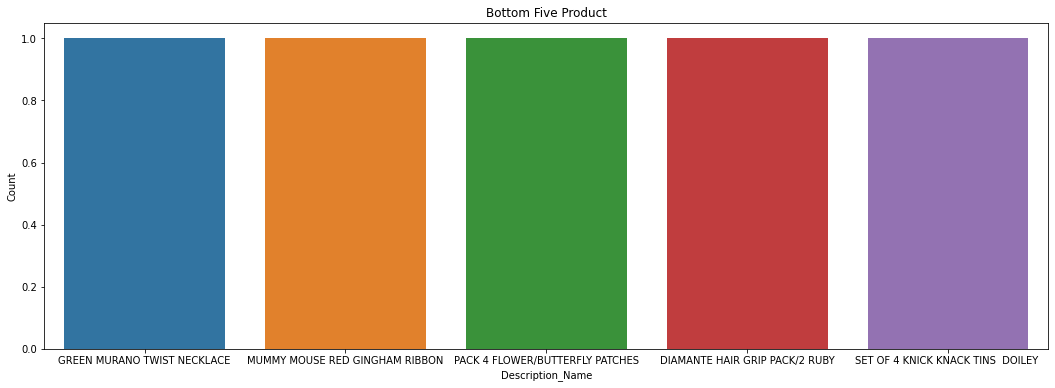

In [17]:
#Plotting bottom five Product Based On Selling
plt.figure(figsize=(18,6))
plt.title('Bottom Five Product')
sns.barplot(x='Description_Name',y='Count',data=Description_df[-5:])

**Bottom Five Product**

1.   Ruby GlassCluster Earning
2.   Pink Chrysanthemums Art Flower
3.   Cake Case Vintage Christmas
4    Wall Art The Magic Forest
5.   Paper Craft Little Birdie




In [18]:
#Creating the table of stock distribution
Stockcode_df = df['StockCode'].value_counts().reset_index()
Stockcode_df.rename(columns={'index':'StockCode_Name'},inplace=True)
Stockcode_df.rename(columns={'StockCode':'Count'},inplace=True)
Stockcode_df.head()

,StockCode_Name,Count
0,85123A,1350
1,22423,1135
2,47566,1007
3,85099B,901
4,20725,813


In [19]:
#Printing Bottom Five rows
Stockcode_df.head()

,StockCode_Name,Count
0,85123A,1350
1,22423,1135
2,47566,1007
3,85099B,901
4,20725,813


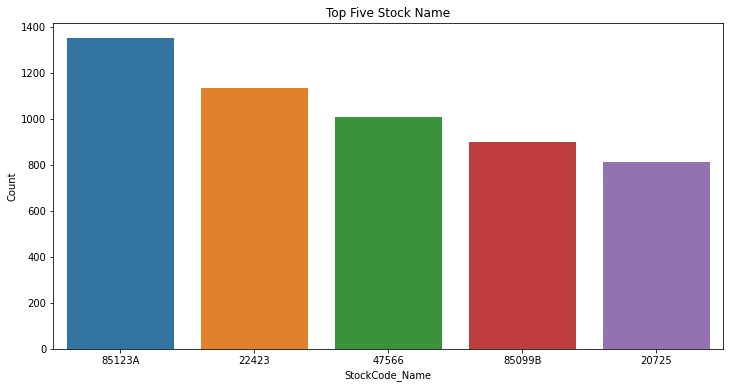

In [20]:
#Plotting Top Five Stock
plt.figure(figsize=(12,6))
plt.title('Top Five Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=Stockcode_df[:5])

**Top Five Stock Name**


1.   85123A
2.   22423
3.   85099B
4.   83879
5.   47566


In [21]:
#List of bottom 5 stockcode name
Stockcode_df.tail()

,StockCode_Name,Count
3356,90130B,1
3357,90033,1
3358,35443,1
3359,90076,1
3360,23333,1


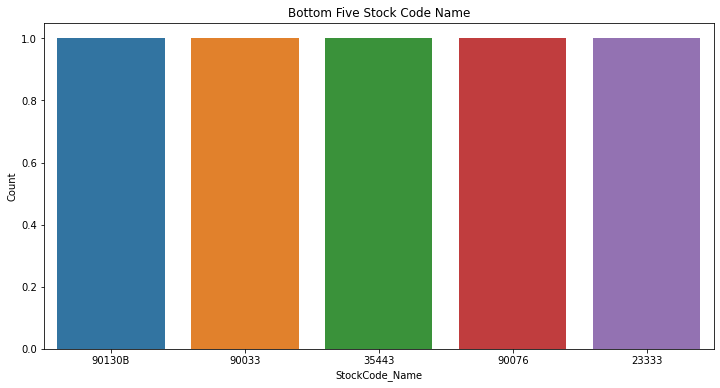

In [22]:
#Plotting bottom five stockcode name
plt.figure(figsize=(12,6))
plt.title('Bottom Five Stock Code Name')
sns.barplot(x='StockCode_Name',y='Count',data=Stockcode_df[-5:])

In [23]:
#Creating the table of countribution with its distribution
country_df = df['Country'].value_counts().reset_index()
country_df.rename(columns={'index':'Country_Name'},inplace=True)
country_df.rename(columns={'Country':'Count'},inplace=True)
country_df.head()

,Country_Name,Count
0,United Kingdom,184500
1,Germany,5060
2,France,4110
3,EIRE,3606
4,Netherlands,1358


In [24]:
#Print tail of countries distribution
country_df.tail()

,Country_Name,Count
31,United Arab Emirates,30
32,USA,22
33,Bahrain,17
34,Czech Republic,15
35,Saudi Arabia,9


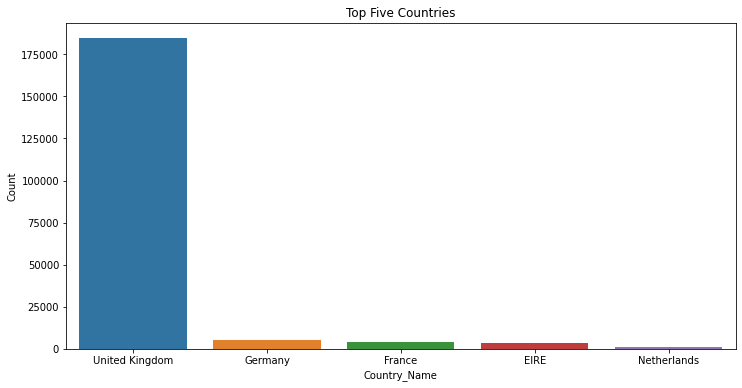

In [25]:
#Ploting top five countries
plt.figure(figsize=(12,6))
plt.title('Top Five Countries')
sns.barplot(x='Country_Name', y='Count',data=country_df[:5] )

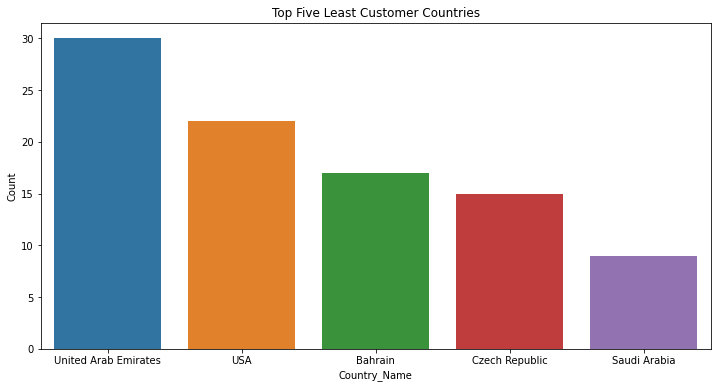

In [26]:
#Plotting top least customer countries
plt.figure(figsize=(12,6))
plt.title('Top Five Least Customer Countries')
sns.barplot(x='Country_Name',y='Count',data=country_df[-5:])

**Observation On Countries Distribution**

*   Most customer are belong to UK, then Germany, France, EIFE and Spain respectively
*   Least customer company are Greece, United Arab Emirate, Austria, Israel and Soudia Arabia



In [27]:
#Checking customer of soudia arabia
df[df['Country']=='Saudi Arabia']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
100810,544838,22915,ASSORTED BOTTLE TOP MAGNETS,12.0,2/24/11 10:34,0.42,12565.0,Saudi Arabia
100811,544838,22363,GLASS JAR MARMALADE,6.0,2/24/11 10:34,2.95,12565.0,Saudi Arabia
100812,544838,22362,GLASS JAR PEACOCK BATH SALTS,6.0,2/24/11 10:34,2.95,12565.0,Saudi Arabia
100813,544838,22361,GLASS JAR DAISY FRESH COTTON WOOL,6.0,2/24/11 10:34,2.95,12565.0,Saudi Arabia
100814,544838,22553,PLASTERS IN TIN SKULLS,12.0,2/24/11 10:34,1.65,12565.0,Saudi Arabia
100815,544838,22555,PLASTERS IN TIN STRONGMAN,12.0,2/24/11 10:34,1.65,12565.0,Saudi Arabia
100816,544838,22556,PLASTERS IN TIN CIRCUS PARADE,12.0,2/24/11 10:34,1.65,12565.0,Saudi Arabia
100817,544838,20781,GOLD EAR MUFF HEADPHONES,2.0,2/24/11 10:34,5.49,12565.0,Saudi Arabia
100818,544838,22969,HOMEMADE JAM SCENTED CANDLES,12.0,2/24/11 10:34,1.45,12565.0,Saudi Arabia


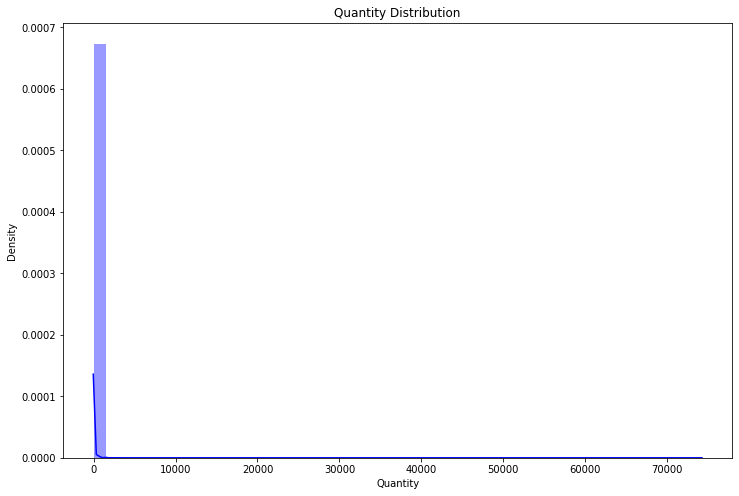

In [28]:
#Plotting Distribution of Quantity
plt.figure(figsize=(12,8))
plt.title("Quantity Distribution")
sns.distplot(df['Quantity'],color="B")

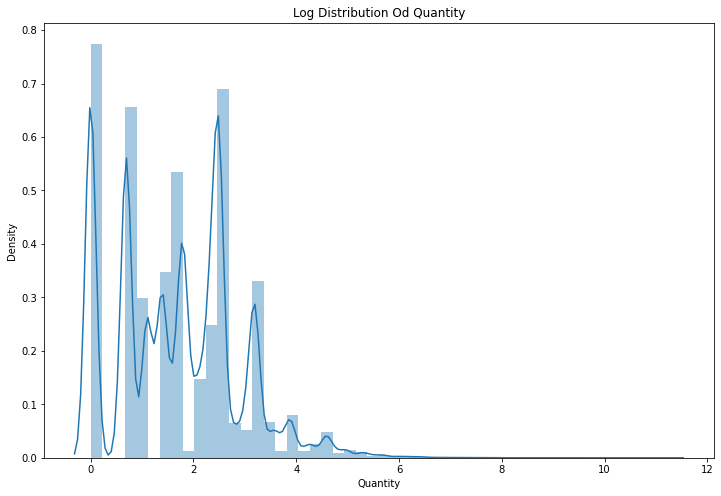

In [29]:
#Distribution Of Quantity with log
plt.figure(figsize=(12,8))
plt.title('Log Distribution Od Quantity')
sns.distplot(np.log(df['Quantity']))

In [30]:
#Checking unique value of Quantity
df['Quantity'].unique()

array([6.0000e+00, 8.0000e+00, 2.0000e+00, 3.2000e+01, 3.0000e+00,
       4.0000e+00, 2.4000e+01, 1.2000e+01, 4.8000e+01, 1.8000e+01,
       2.0000e+01, 3.6000e+01, 8.0000e+01, 6.4000e+01, 1.0000e+01,
       1.2000e+02, 9.6000e+01, 2.3000e+01, 5.0000e+00, 1.0000e+00,
       5.0000e+01, 4.0000e+01, 1.0000e+02, 1.9200e+02, 4.3200e+02,
       1.4400e+02, 2.8800e+02, 1.6000e+01, 9.0000e+00, 1.2800e+02,
       2.5000e+01, 3.0000e+01, 2.8000e+01, 7.0000e+00, 7.2000e+01,
       2.0000e+02, 6.0000e+02, 4.8000e+02, 1.4000e+01, 1.1000e+01,
       7.0000e+01, 2.5200e+02, 6.0000e+01, 2.1600e+02, 3.8400e+02,
       2.7000e+01, 1.0800e+02, 5.2000e+01, 7.5000e+01, 2.7000e+02,
       4.2000e+01, 2.4000e+02, 9.0000e+01, 3.2000e+02, 1.7000e+01,
       1.8240e+03, 2.0400e+02, 6.9000e+01, 1.6000e+02, 2.8800e+03,
       1.4000e+03, 1.9000e+01, 3.9000e+01, 5.6000e+01, 1.3000e+01,
       1.4400e+03, 1.5000e+01, 7.2000e+02, 1.5600e+02, 3.2400e+02,
       4.1000e+01, 4.0200e+02, 3.7800e+02, 1.5000e+02, 3.0000e

In [31]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207928 entries, 0 to 295788
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    207928 non-null  object 
 1   StockCode    207928 non-null  object 
 2   Description  207928 non-null  object 
 3   Quantity     207928 non-null  float64
 4   InvoiceDate  207928 non-null  object 
 5   UnitPrice    207928 non-null  float64
 6   CustomerID   207928 non-null  float64
 7   Country      207928 non-null  object 
dtypes: float64(3), object(5)
memory usage: 14.3+ MB


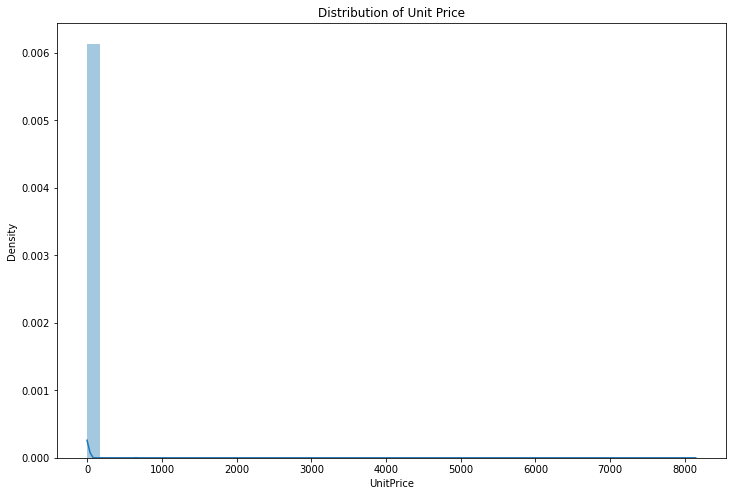

In [32]:
#Checking the disatribution of unitprice
plt.figure(figsize=(12,8))
plt.title('Distribution of Unit Price')
sns.distplot(df['UnitPrice'])

In [33]:
#Checking the dispersion of price unit
df['UnitPrice'].describe([0.75,0.90,0.95,0.99])

count    207928.000000
mean          3.211150
std          22.016003
min           0.000000
50%           1.950000
75%           3.750000
90%           6.950000
95%           8.500000
99%          14.950000
max        8142.750000
Name: UnitPrice, dtype: float64

In [34]:
#Checking values wethere any values less than zero
df[df['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [35]:
#Selecting data only unit have greater than zero
df = df[df['UnitPrice']>0]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/10 8:26,3.39,17850.0,United Kingdom


#**Feature engineering**

In [36]:
#Createing columns for day, dayname, year,month, hour, minute 
#with excrating respective data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['WeekDay'] = df['InvoiceDate'].dt.day_name()
df['Month'] = df['InvoiceDate'].dt.month_name()
df['Day']= df['InvoiceDate'].apply(lambda x: x.day)
df['Year'] = df['InvoiceDate'].apply(lambda x: x.year)
#df['Month'] = df['InvoiceDate'].apply(lambda x: x.month)
df['Hour'] = df['InvoiceDate'].apply(lambda x: x.hour)
df['Minute'] = df['InvoiceDate'].apply(lambda x: x.minute)

In [37]:
#Create New feature of total amount
df['Total Amount'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Month,Day,Year,Hour,Minute,Total Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34


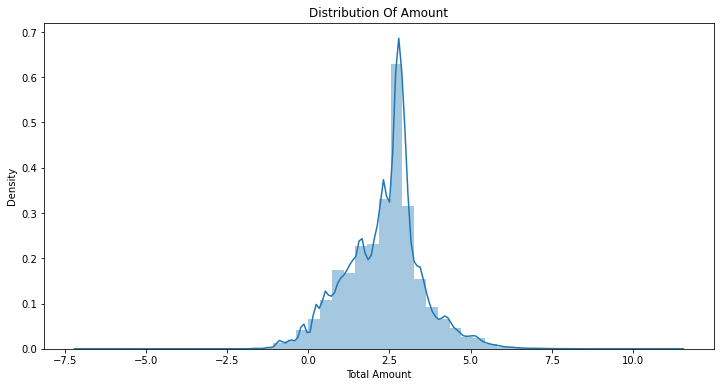

In [38]:
#Plotting distribution of total amount
plt.figure(figsize=(12,6))
plt.title("Distribution Of Amount")
sns.distplot(np.log(df['Total Amount']))

In [39]:
#Checking statistical distribution description of totalAmount
df['Total Amount'].describe([0.75,0.90, 0.95, 0.99])

count    207912.000000
mean         23.066478
std         203.918713
min           0.001000
50%          12.600000
75%          19.800000
90%          37.500000
95%          69.600000
99%         204.000000
max       77183.600000
Name: Total Amount, dtype: float64

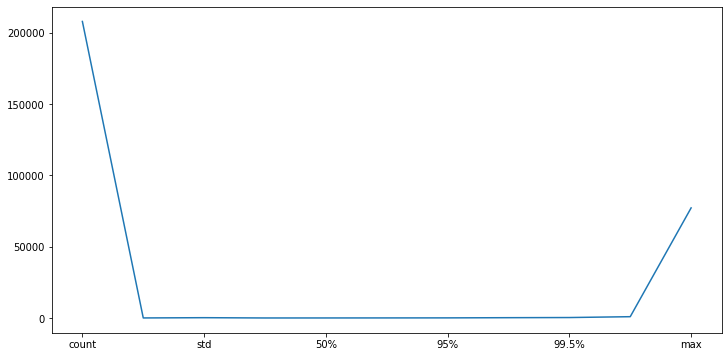

In [40]:
#plotting description
plt.figure(figsize=(12,6))
df['Total Amount'].describe([0.90, 0.95, 0.99,0.995, 0.999]).plot()

In [41]:
#Create columns to count days of week
week_day = df['WeekDay'].value_counts().reset_index()
week_day.rename(columns={'index':'Week_Name','WeekDay':'Count'},inplace=True)
week_day.head()

,Week_Name,Count
0,Thursday,42537
1,Wednesday,37107
2,Tuesday,35754
3,Monday,33336
4,Sunday,31205


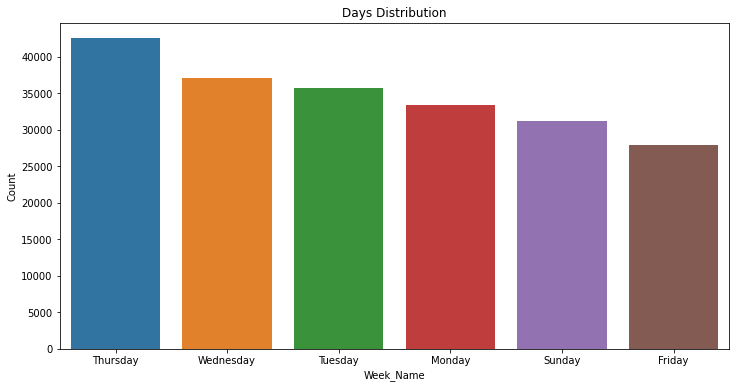

In [42]:
#Plotting Day Names 
plt.figure(figsize=(12,6))
plt.title("Days Distribution")
sns.barplot(x='Week_Name',y='Count',data=week_day)

In [43]:
#Distribution of sales by month
month_df = df['Month'].value_counts().reset_index()
month_df.rename(columns={'index':'Month_Name','Month':'Count'},inplace=True)
month_df.head()

,Month_Name,Count
0,May,28320
1,June,27185
2,March,27175
3,July,26825
4,December,26157


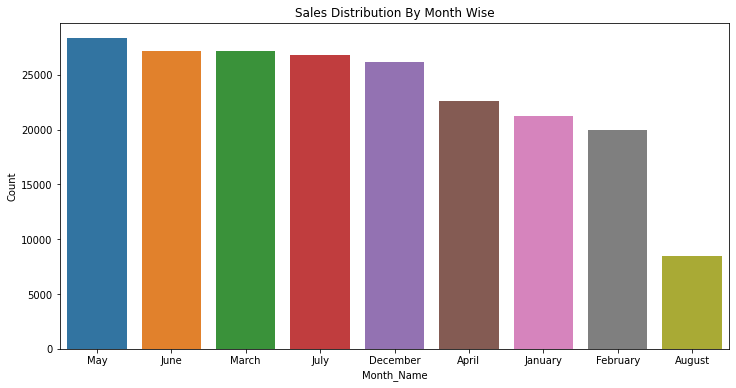

In [44]:
#Plotting distribution of sales by month
plt.figure(figsize=(12,6))
plt.title("Sales Distribution By Month Wise")
sns.barplot(x='Month_Name',y='Count', data=month_df)

**Most sales happens on the month of November and least sales happens on February**

In [45]:
#Creating the table on hours distribution
hour_df = df['Hour'].value_counts().reset_index()
hour_df.rename(columns={'index':'Hour_times','Hour':'Count'},inplace=True)
hour_df

,Hour_times,Count
0,12,36948
1,13,33193
2,11,27787
3,14,26274
4,15,22679
5,10,21554
6,9,12124
7,16,11652
8,17,6299
9,8,4795


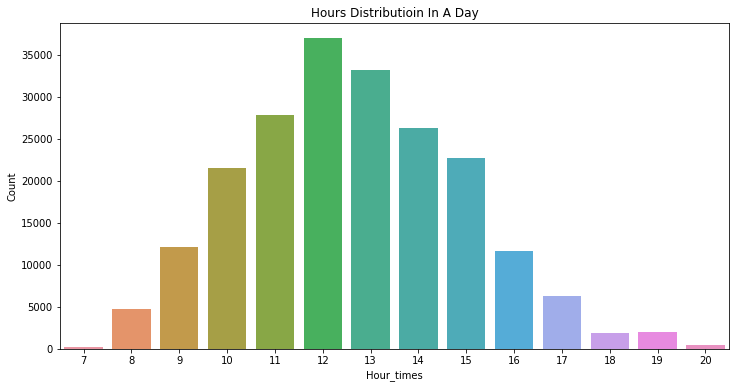

In [46]:
#Plotting distribution of hours
plt.figure(figsize=(12,6))
plt.title("Hours Distributioin In A Day")
sns.barplot(x='Hour_times', y='Count',data=hour_df)

In [47]:
#defining the function for binning the times
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif (time==12 or time==13 or time==14 or time==15 or time==16):
    return 'After Noon'
  else:
    return 'Evening'


In [48]:
#Appling the defining function for time type columns
df['Time_type']= df['Hour'].apply(time_type)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Month,Day,Year,Hour,Minute,Total Amount,Time_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,15.30,Morning
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,22.00,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34,Morning


In [49]:
#Appling the defining function for time type columns
df['Time_type']= df['Hour'].apply(time_type)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Month,Day,Year,Hour,Minute,Total Amount,Time_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,15.30,Morning
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,22.00,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34,Morning


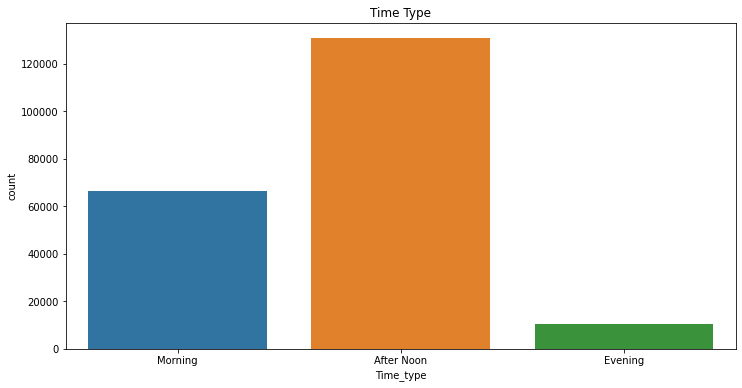

In [50]:
#Ploting count plot on time type
plt.figure(figsize=(12,6))
plt.title('Time Type')
sns.countplot(x='Time_type',data=df)

**Most purchase happens on after noon then morning then evening**

In [51]:
#Checking dataframe after some preprocessing
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,WeekDay,Month,Day,Year,Hour,Minute,Total Amount,Time_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,15.30,Morning
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,22.00,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,December,1,2010,8,26,20.34,Morning


In [52]:
#Creating RFM model
import datetime as dt

#creating last date
last_date = dt.datetime(2011,12,10)

#creating rfm model
rfm_df = df.groupby("CustomerID").agg({'InvoiceDate': lambda x:(last_date-x.max()).days, 'InvoiceNo': lambda x: len(x), 'Total Amount': lambda x:x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename columns name into Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate':'Recency',
                       'InvoiceNo':'Frequency',
                       'Total Amount':'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,129,124,2790.86
2,12348.0,248,28,1487.24
3,12350.0,310,17,334.40
4,12352.0,262,38,1561.81


In [53]:
#Describtive statics of statistics
rfm_df.Recency.describe([0.1, 0.25, 0.50,0.75,0.90,0.99])

count    3204.000000
mean      205.848627
std        70.560841
min       122.000000
10%       130.000000
25%       145.000000
50%       185.000000
75%       254.000000
90%       316.700000
99%       372.000000
max       373.000000
Name: Recency, dtype: float64

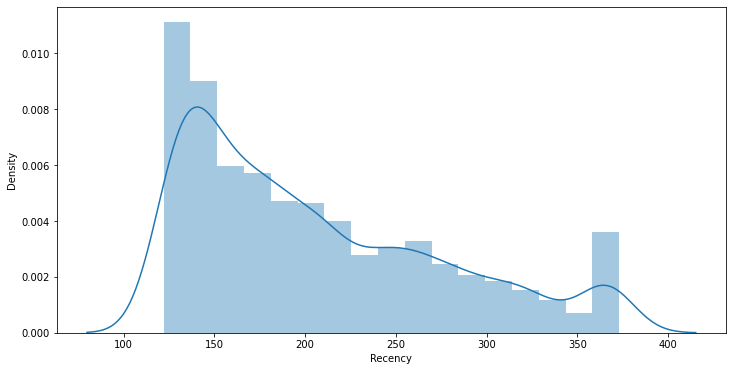

In [54]:
#Recency Distribution plot
plt.figure(figsize=(12,6))
sns.distplot(rfm_df['Recency'])

In [55]:
#Descriptive statistics of frequency
rfm_df.Frequency.describe([0.1, 0.25, 0.50,0.75,0.90,0.99])

count    3204.000000
mean       64.891386
std       131.536305
min         1.000000
10%         6.000000
25%        14.000000
50%        31.000000
75%        73.000000
90%       144.000000
99%       427.880000
max      3761.000000
Name: Frequency, dtype: float64

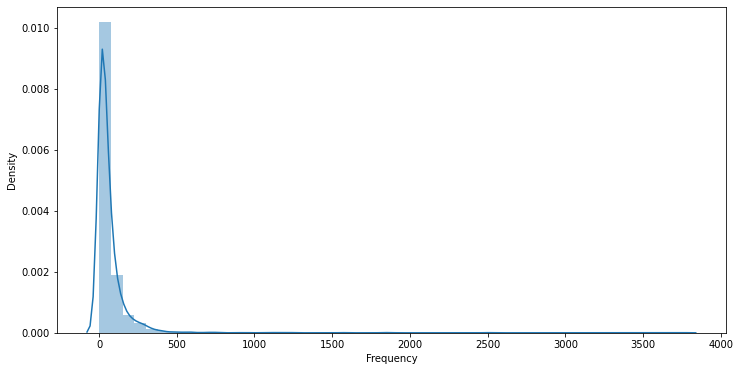

In [56]:
#Plotting frquency in rfm
plt.figure(figsize=(12,6))
sns.distplot(rfm_df['Frequency'])

In [60]:
#Descriptive statistics of monetary
rfm_df.Monetary.describe([0.1, 0.25, 0.50,0.75,0.90,0.99])

count      3204.000000
mean       1496.815728
std        5483.456947
min           2.900000
10%         137.978000
25%         257.035000
50%         541.005000
75%        1276.180000
90%        2677.138000
99%       14364.483100
max      148526.840000
Name: Monetary, dtype: float64

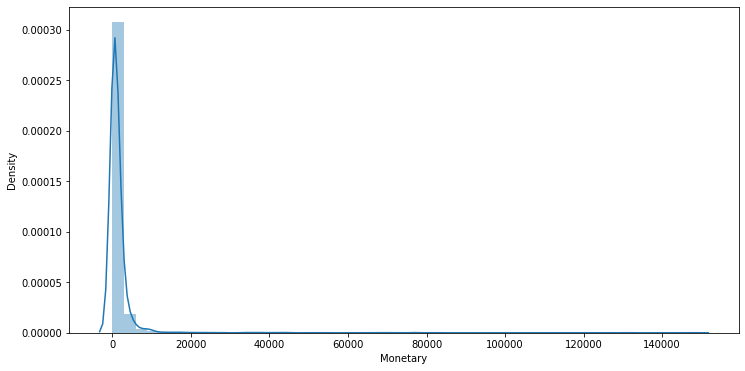

In [58]:
#Plotting distribution of monetary
plt.figure(figsize=(12,6))
sns.distplot(rfm_df['Monetary'])

In [59]:
#Splitting rfm into four segment using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Frequency': {0.25: 14.0, 0.5: 31.0, 0.75: 73.0},
 'Monetary': {0.25: 257.03499999999997, 0.5: 541.0050000000001, 0.75: 1276.18},
 'Recency': {0.25: 145.0, 0.5: 185.0, 0.75: 254.0}}